In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2.5,
    'figure.figsize': (10, 8)
})

In [97]:
def plot_verification_raw(csv_path, model_name) :
    df = pd.read_csv(csv_path)

    data = df[['mi-tet', 'expr', 'grad_norm']].dropna().reset_index(drop=True)

    x = data.index * 10

    data['sqrt_mi_tet'] = np.sqrt(data['mi-tet'])

    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    y_upper = data['sqrt_mi_tet']
    y_target = data['grad_norm']

    axes[0].plot(x, y_upper, label="$\\sqrt{I(A; \\tilde{Y})}$ (Upper Bound)", color="tab:blue", linewidth=2.5)
    axes[0].plot(x, y_target, label="$||\\nabla \\eta||$ (Gradient Norm)", color="tab:green", linewidth=2.5, linestyle="--")
    axes[0].fill_between(x, y_upper, y_target, where=(y_upper >= y_target), interpolate=True, color="gray", alpha=0.15, label="Bound holds")
    axes[0].fill_between(x, y_upper, y_target, where=(y_upper < y_target), interpolate=True, color="red", alpha=0.2, label="Bound Vioalated")

    #axes[0].set_title(f"{model_name}: Trainability Verification (Raw Data)", fontsize=16)
    axes[0].set_ylabel("Value", fontsize=14)
    axes[0].legend(fontsize=16, loc='upper right')
    axes[0].grid(True, alpha=0.3)

    y_upper_2 = data["mi-tet"]
    y_target_2 = data["expr"]

    axes[1].plot(x, y_upper_2, label="$I(A; \\tilde{Y})$ (Upper Bound)", color="tab:blue", linewidth=2.5)
    axes[1].plot(x, y_target_2, label="Expressivity (JSD)", color="tab:green", linewidth=2.5, linestyle="--")
    axes[1].fill_between(x, y_upper_2, y_target_2, where=(y_upper_2 >= y_target_2), interpolate=True, color="gray", alpha=0.15, label="Bound holds")
    axes[1].fill_between(x, y_upper_2, y_target_2, where=(y_upper_2 < y_target_2), interpolate=True, color="red", alpha=0.2, label="Bound Vioalated")

    #axes[1].set_title(f"{model_name}: Expressivity Verification (Raw Data)", fontsize=16)
    axes[1].set_xlabel("Epsisode (Batch)", fontsize=16)
    axes[1].set_ylabel("Value", fontsize=16)
    axes[1].legend(fontsize=18, loc='upper right')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f"{model_name}_ThmVerification_one_axis_revised.png", dpi=300)

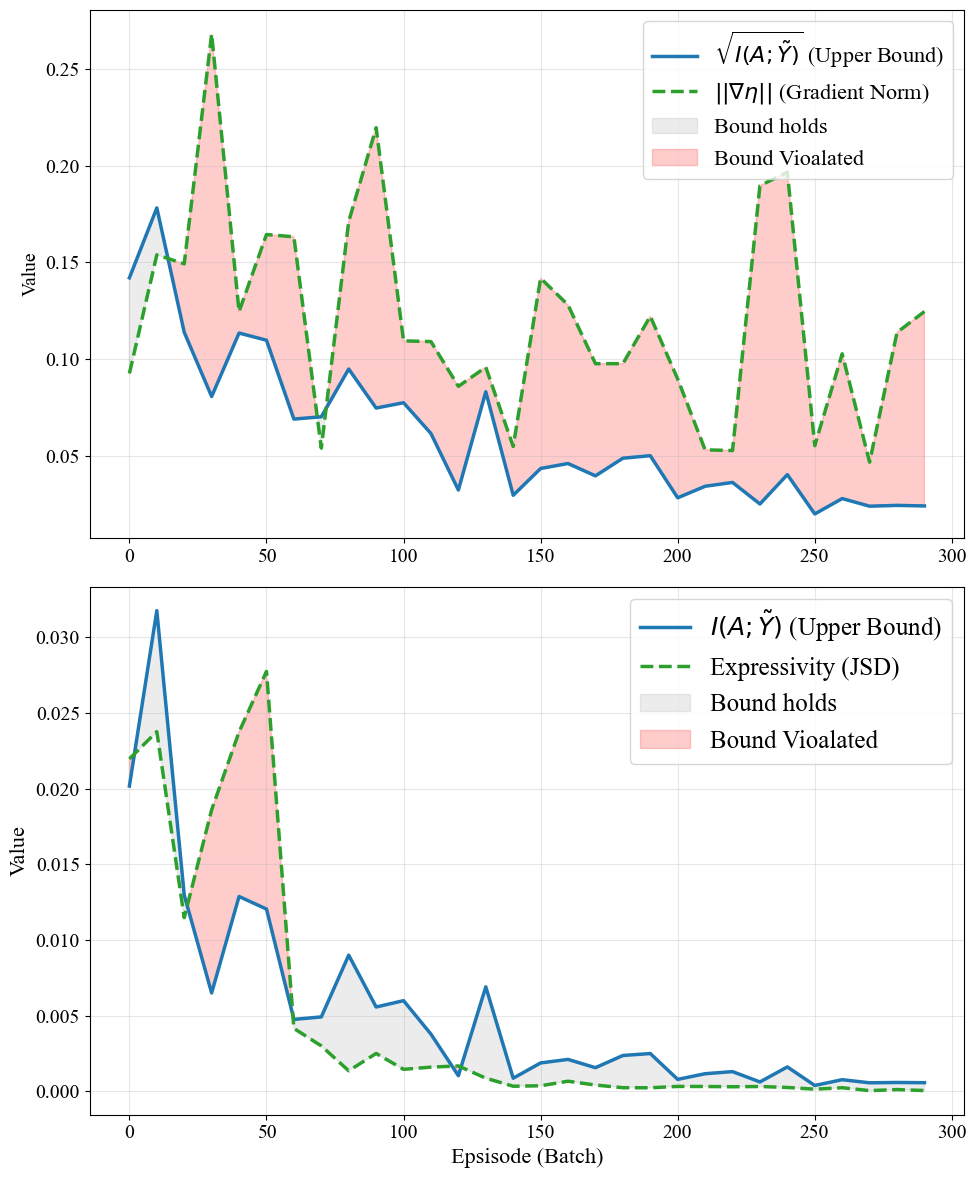

In [107]:
plot_verification_raw("results_default.csv", "Default")

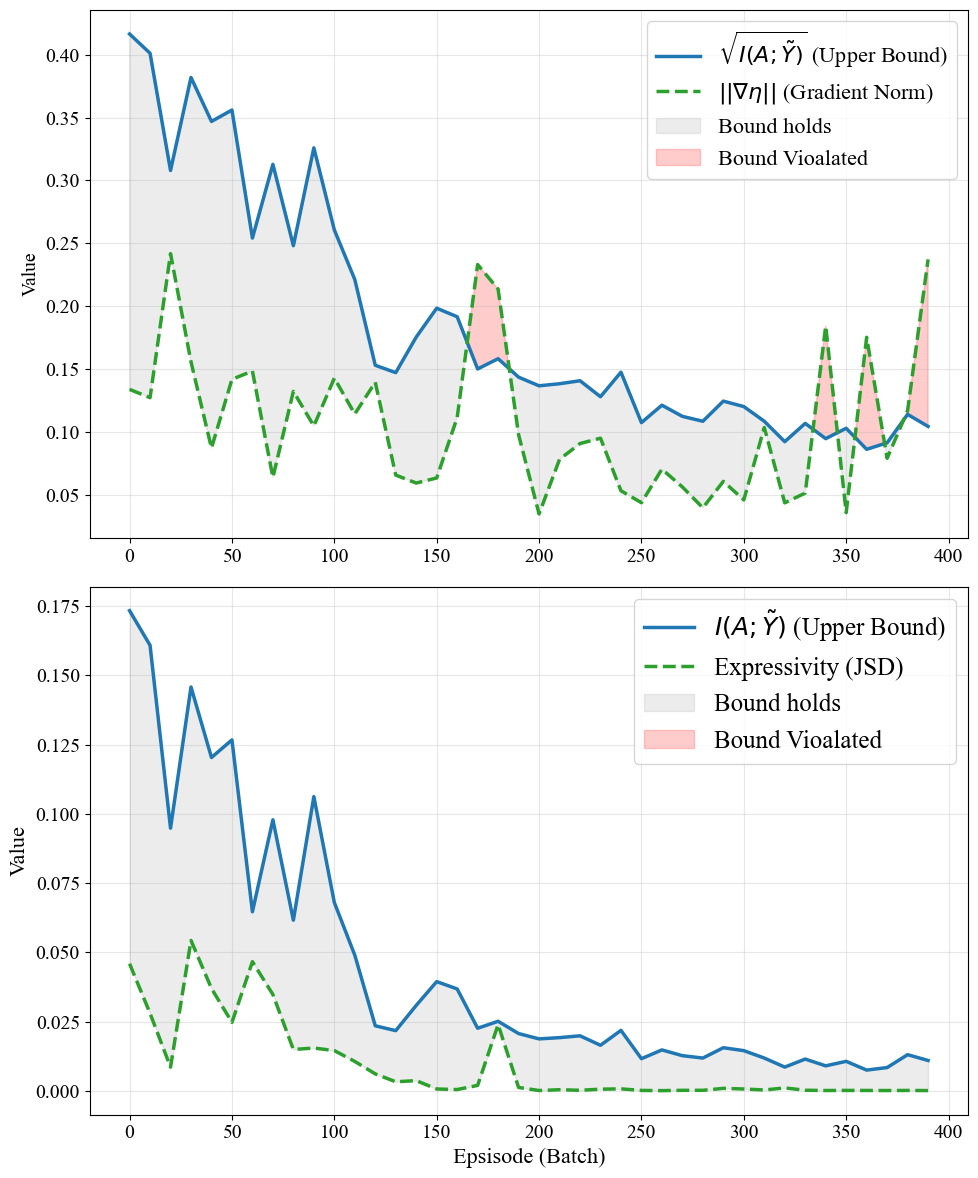

In [113]:
plot_verification_raw("resuls_default.csv", "Default")

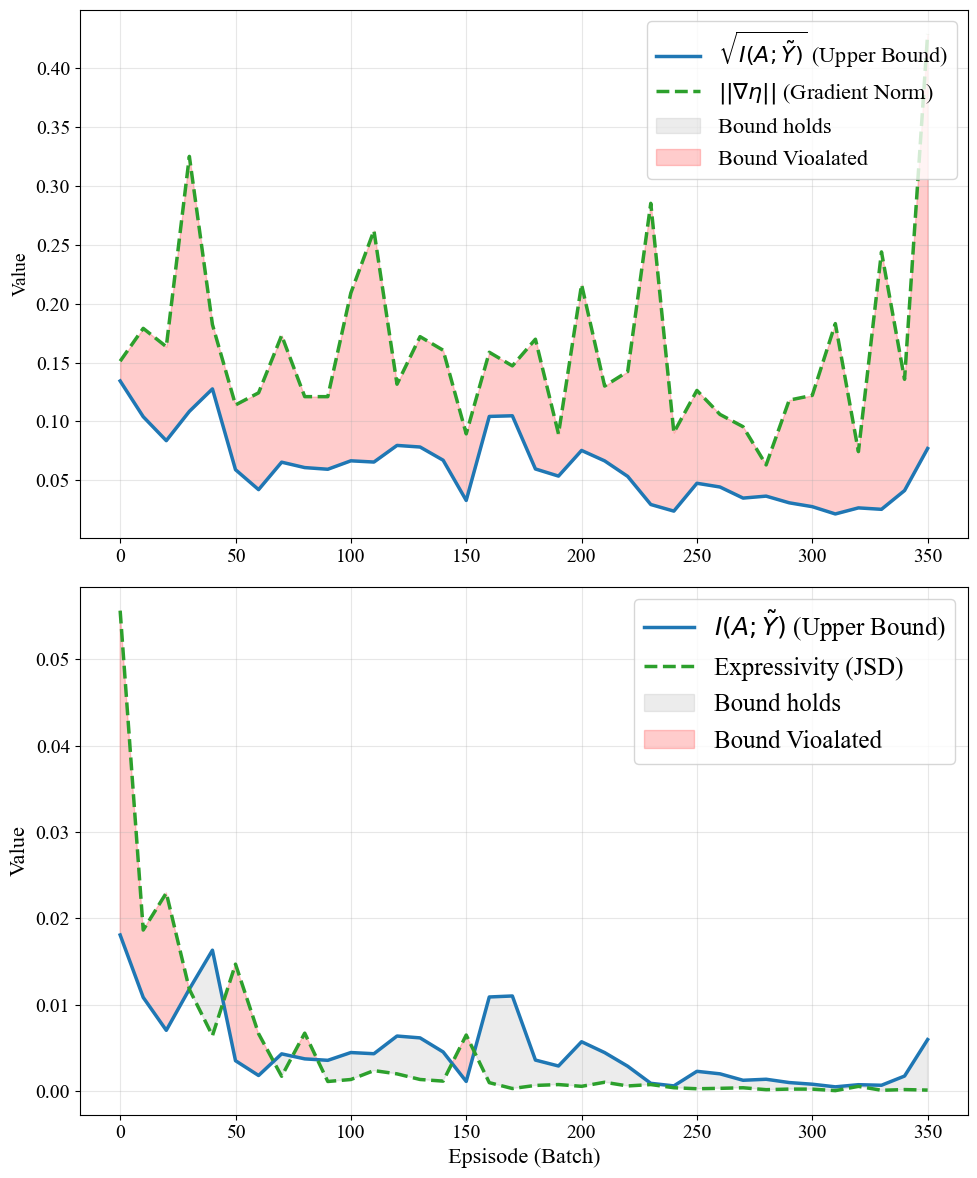

In [108]:
plot_verification_raw("results_deep_BP.csv", "Deep_BP")

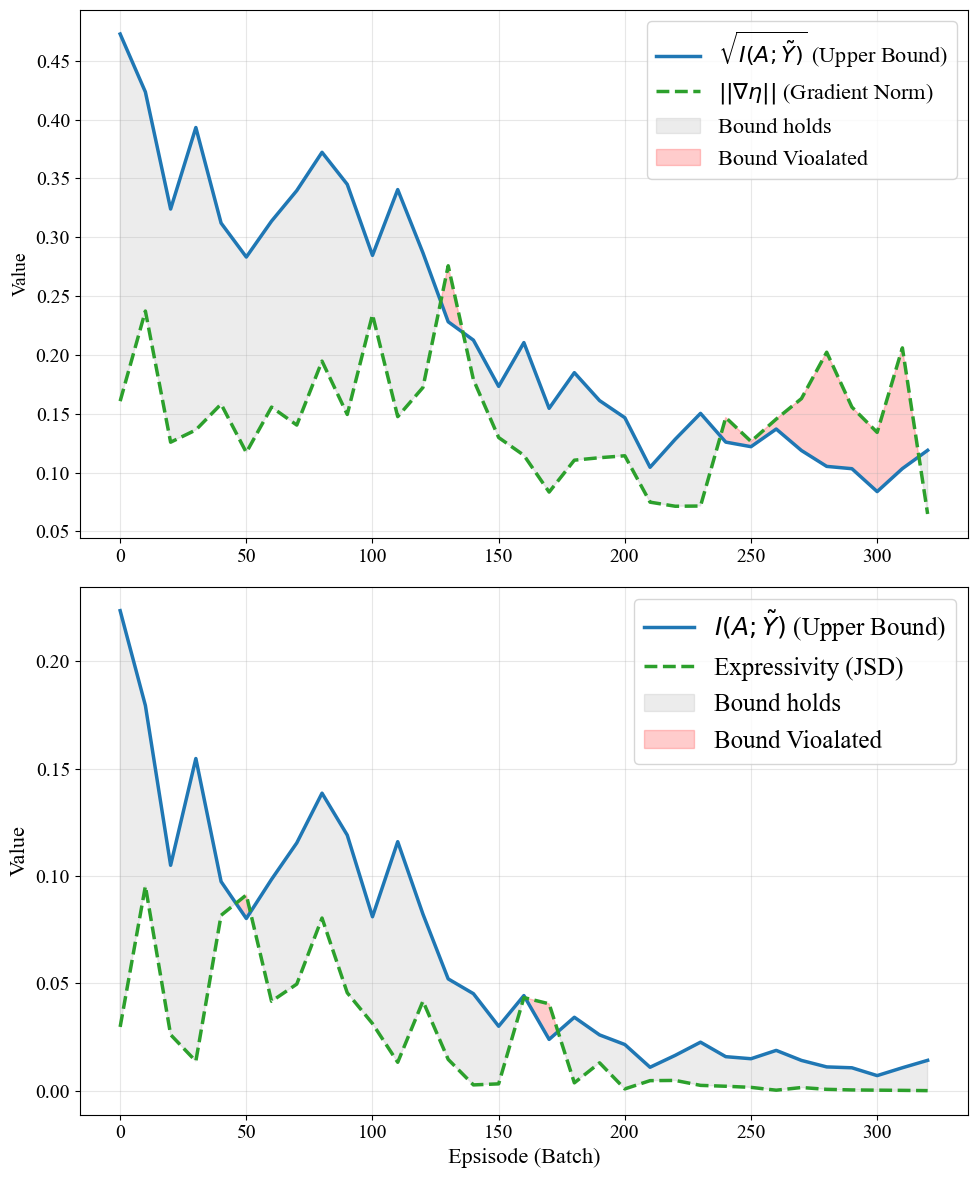

In [114]:
plot_verification_raw("resuls_deep_BP.csv", "Deep_BP")

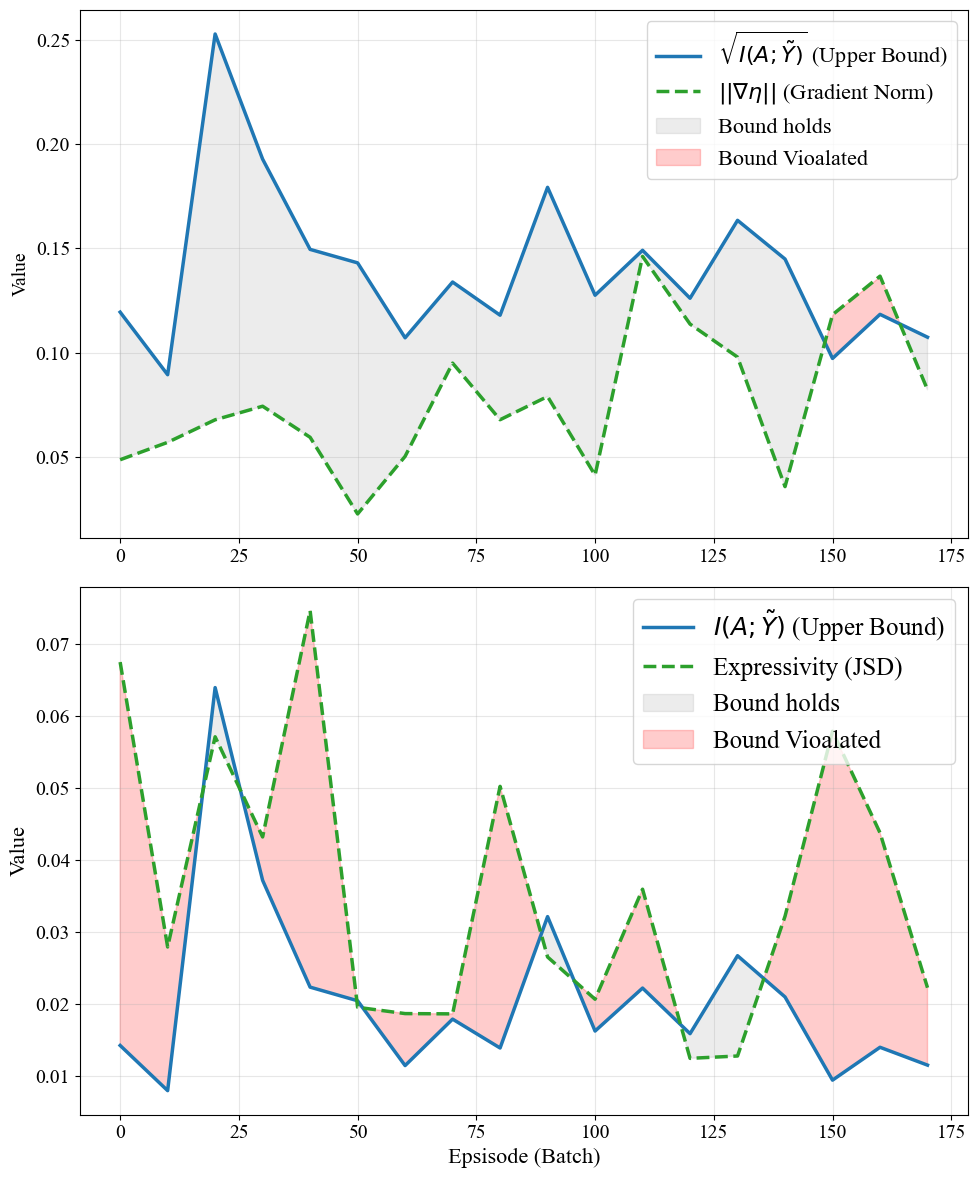

In [109]:
plot_verification_raw("results_shallow.csv", "Shallow")

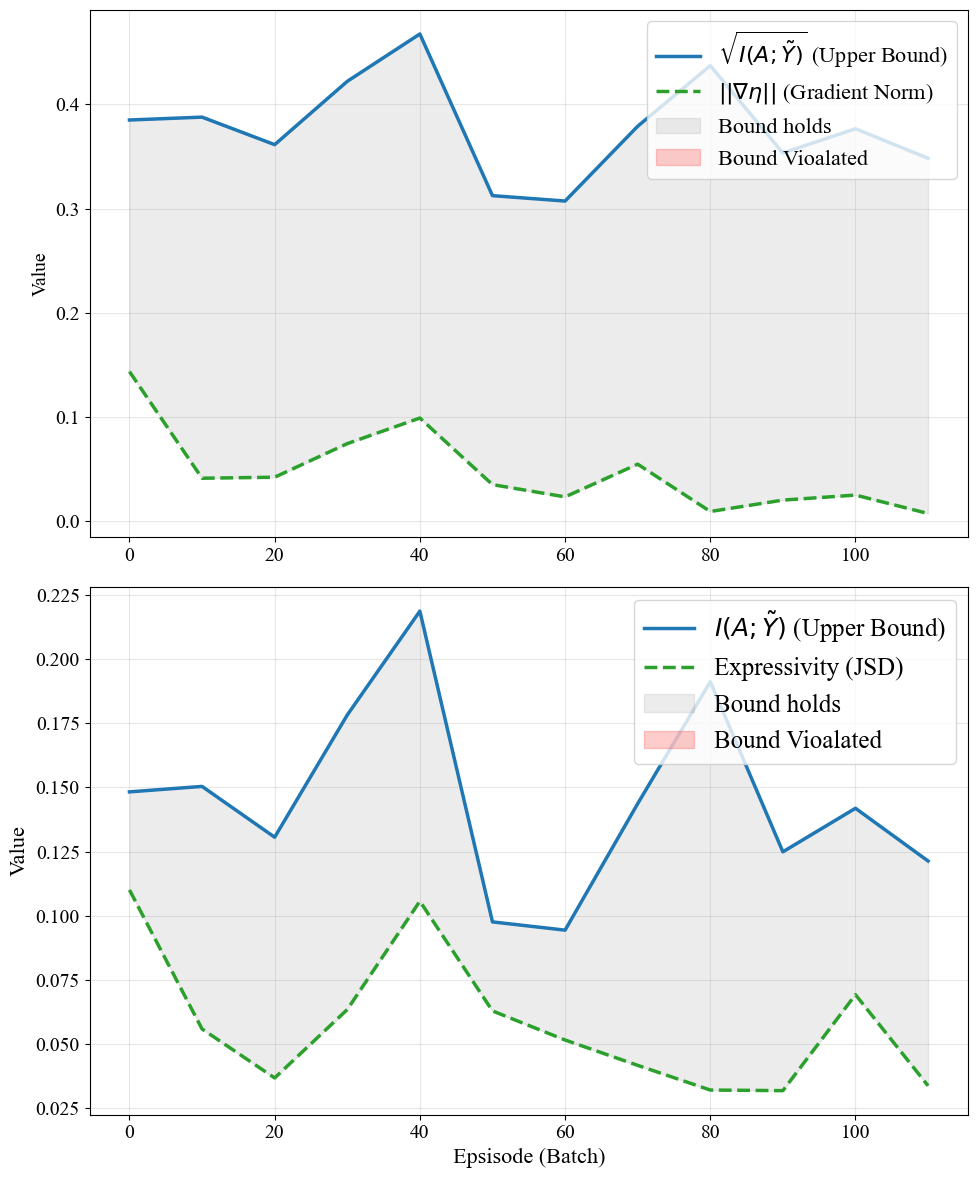

In [115]:
plot_verification_raw("resuls_shallow.csv", "Shallow")

In [98]:
def plot_verification_scaled(csv_path, model_name) :
    df = pd.read_csv(csv_path)
    data = df[['mi-tet', 'expr', 'grad_norm', 'rewards']].dropna().reset_index(drop=True)
    x = data.index * 10
    data['sqrt_mi_tet'] = np.sqrt(data['mi-tet'])

    epsilon = 1e-9
    ratios_c = data['grad_norm'] / (data['sqrt_mi_tet'] + epsilon)
    C_estimated = ratios_c.max()

    ratios_k = data['expr'] / (data['mi-tet'] + epsilon)
    K_estimated = ratios_k.max()

    Y_max_observed = data['rewards'].max()

    print(f"--- [{model_name}] Data-Driven Estimation ---")
    print(f"1. Observed Y_max (Reward): {Y_max_observed}")
    print(f"2. Estimated Constant C (Trainability): {C_estimated:.4f}")
    print(f"3. Estimated Cosntant K (Expressivity): {K_estimated:.4f}")
    print("-----------------------------------------------")

    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    y_upper = data['sqrt_mi_tet'] * C_estimated
    y_target = data['grad_norm']

    axes[0].plot(x, y_upper, label="$\\sqrt{I(A; \\tilde{Y})}$ (Upper Bound)", color="tab:blue", linewidth=2.5)
    axes[0].plot(x, y_target, label="$||\\nabla \\eta||$ (Gradient Norm)", color="tab:green", linewidth=2.5, linestyle="--")
    axes[0].fill_between(x, y_upper, y_target, where=(y_upper >= y_target), interpolate=True, color="gray", alpha=0.15, label="Bound holds")
    axes[0].fill_between(x, y_upper, y_target, where=(y_upper < y_target), interpolate=True, color="red", alpha=0.2, label="Bound Vioalated")

    #axes[0].set_title(f"{model_name}: Trainability Verification (Scaled Data)", fontsize=16)
    axes[0].set_ylabel("Value", fontsize=16)
    axes[0].legend(fontsize=16, loc='upper right')
    axes[0].grid(True, alpha=0.3)

    y_upper_2 = data["mi-tet"] * K_estimated
    y_target_2 = data["expr"]

    axes[1].plot(x, y_upper_2, label="$I(A; \\tilde{Y})$ (Upper Bound)", color="tab:blue", linewidth=2.5)
    axes[1].plot(x, y_target_2, label="Expressivity (JSD)", color="tab:green", linewidth=2.5, linestyle="--")
    axes[1].fill_between(x, y_upper_2, y_target_2, where=(y_upper_2 >= y_target_2), interpolate=True, color="gray", alpha=0.15, label="Bound holds")
    axes[1].fill_between(x, y_upper_2, y_target_2, where=(y_upper_2 < y_target_2), interpolate=True, color="red", alpha=0.2, label="Bound Vioalated")

    #axes[1].set_title(f"{model_name}: Expressivity Verification (Scaled Data)", fontsize=16)
    axes[1].set_xlabel("Epsisode (Batch)", fontsize=16)
    axes[1].set_ylabel("Value", fontsize=16)
    axes[1].legend(fontsize=18, loc='upper right')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f"{model_name}_ThmVerification_one_axis_scaled_revised.png", dpi=300)

--- [Default] Data-Driven Estimation ---
1. Observed Y_max (Reward): 50.0
2. Estimated Constant C (Trainability): 2.2677
3. Estimated Cosntant K (Expressivity): 0.9519
-----------------------------------------------


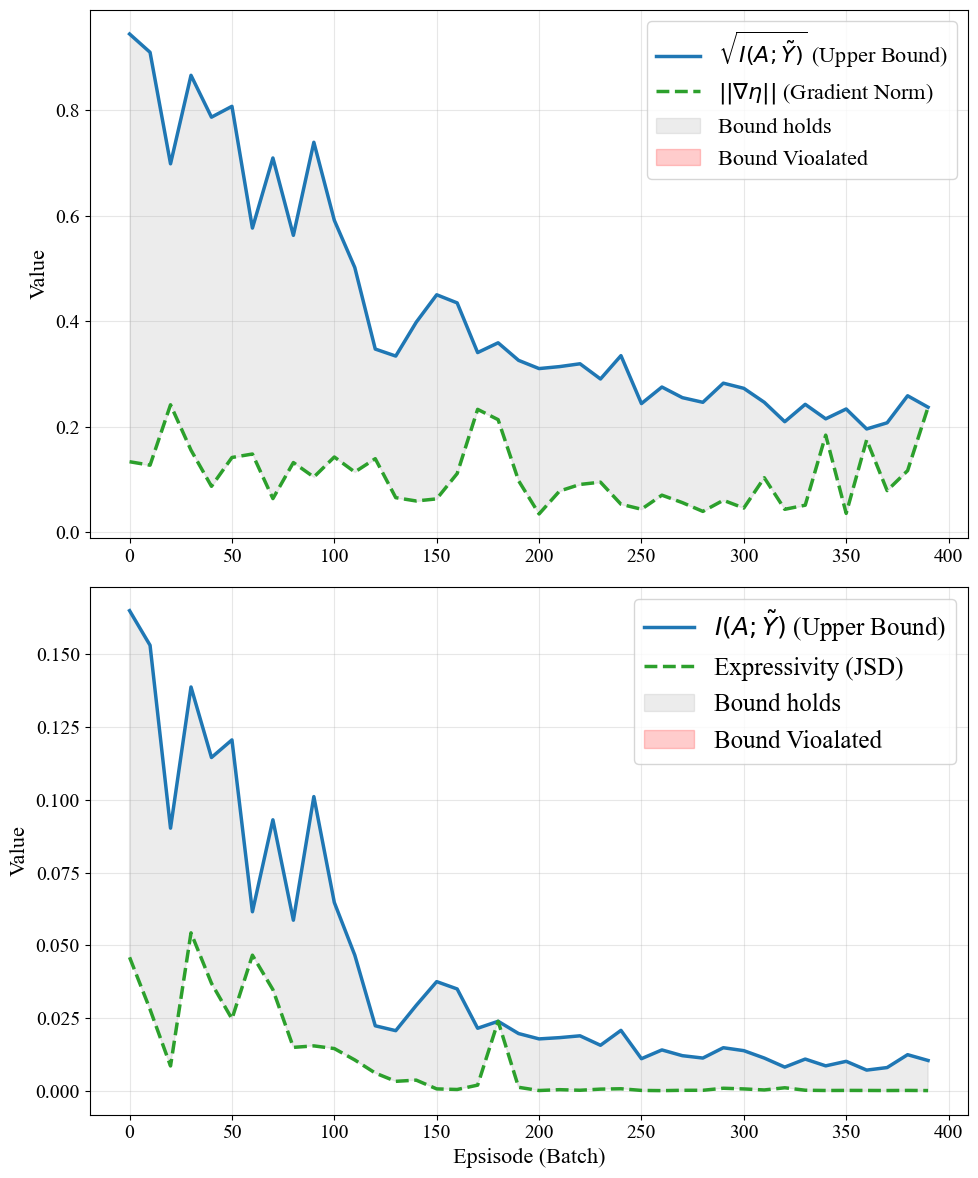

In [116]:
plot_verification_scaled("resuls_default.csv", "Default")

--- [Default] Data-Driven Estimation ---
1. Observed Y_max (Reward): 57.0
2. Estimated Constant C (Trainability): 7.5646
3. Estimated Cosntant K (Expressivity): 2.8592
-----------------------------------------------


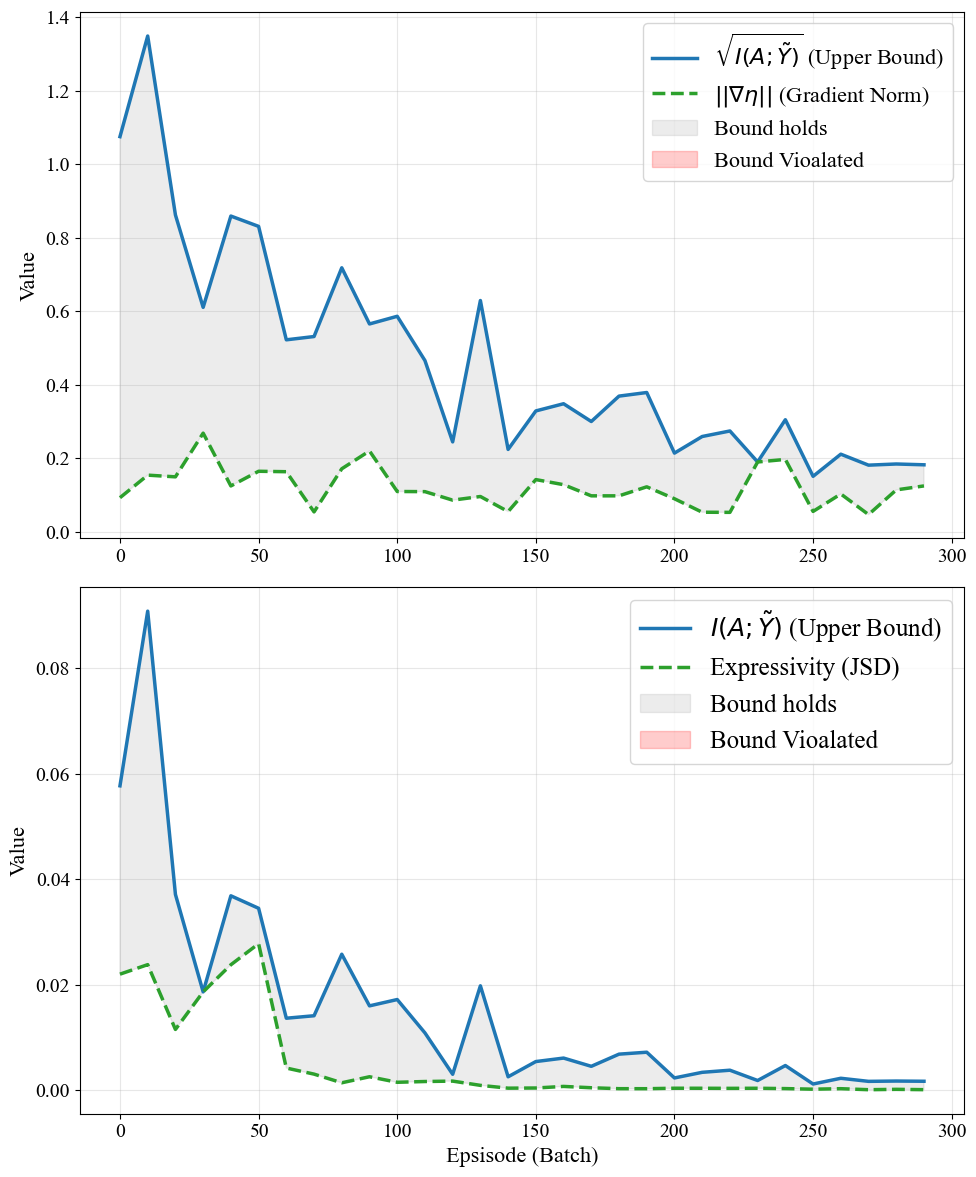

In [110]:
plot_verification_scaled("results_default.csv", "Default")

--- [Deep_BP] Data-Driven Estimation ---
1. Observed Y_max (Reward): 44.0
2. Estimated Constant C (Trainability): 1.9930
3. Estimated Cosntant K (Expressivity): 1.6938
-----------------------------------------------


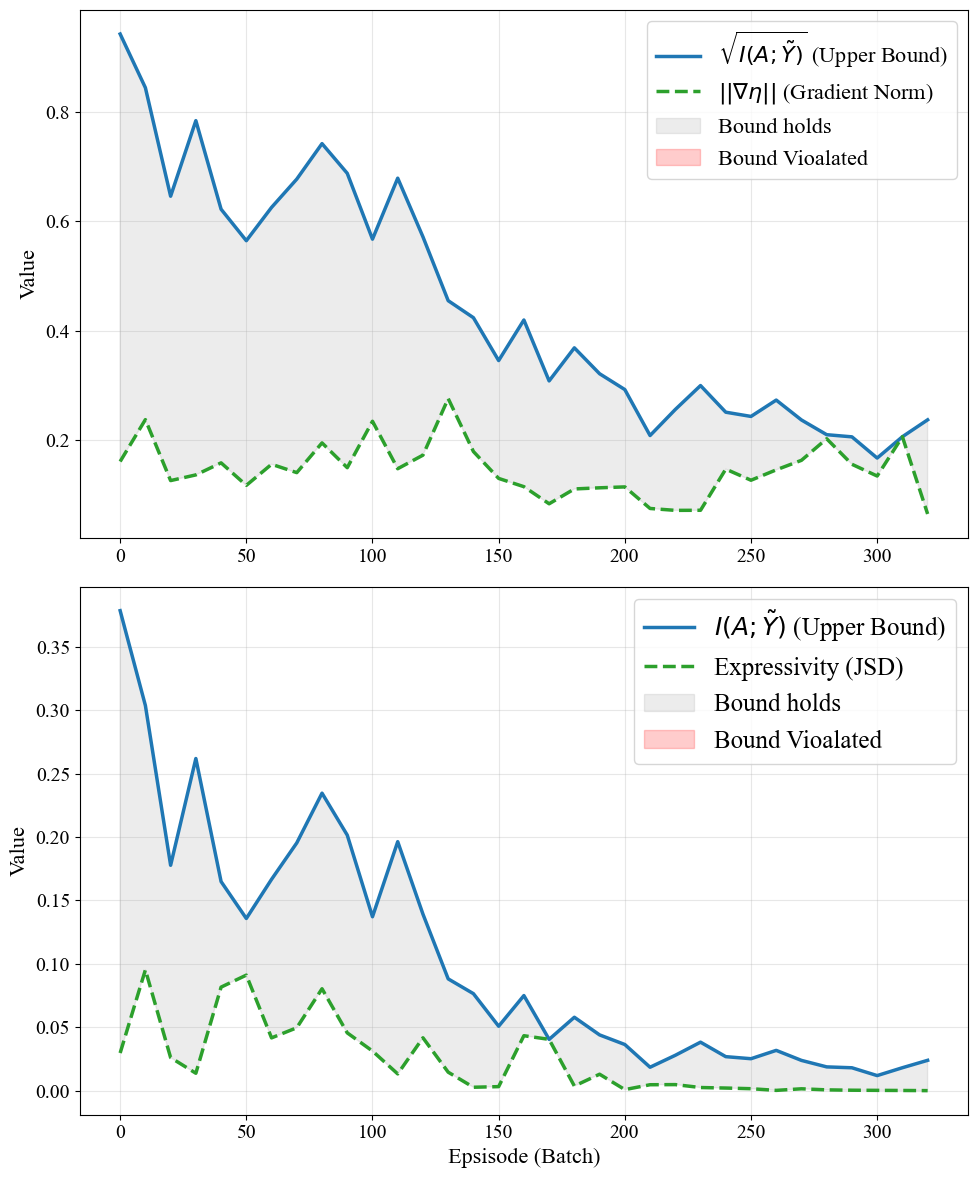

In [117]:
plot_verification_scaled("resuls_deep_BP.csv", "Deep_BP")

--- [Deep_BP] Data-Driven Estimation ---
1. Observed Y_max (Reward): 113.0
2. Estimated Constant C (Trainability): 9.6546
3. Estimated Cosntant K (Expressivity): 5.9357
-----------------------------------------------


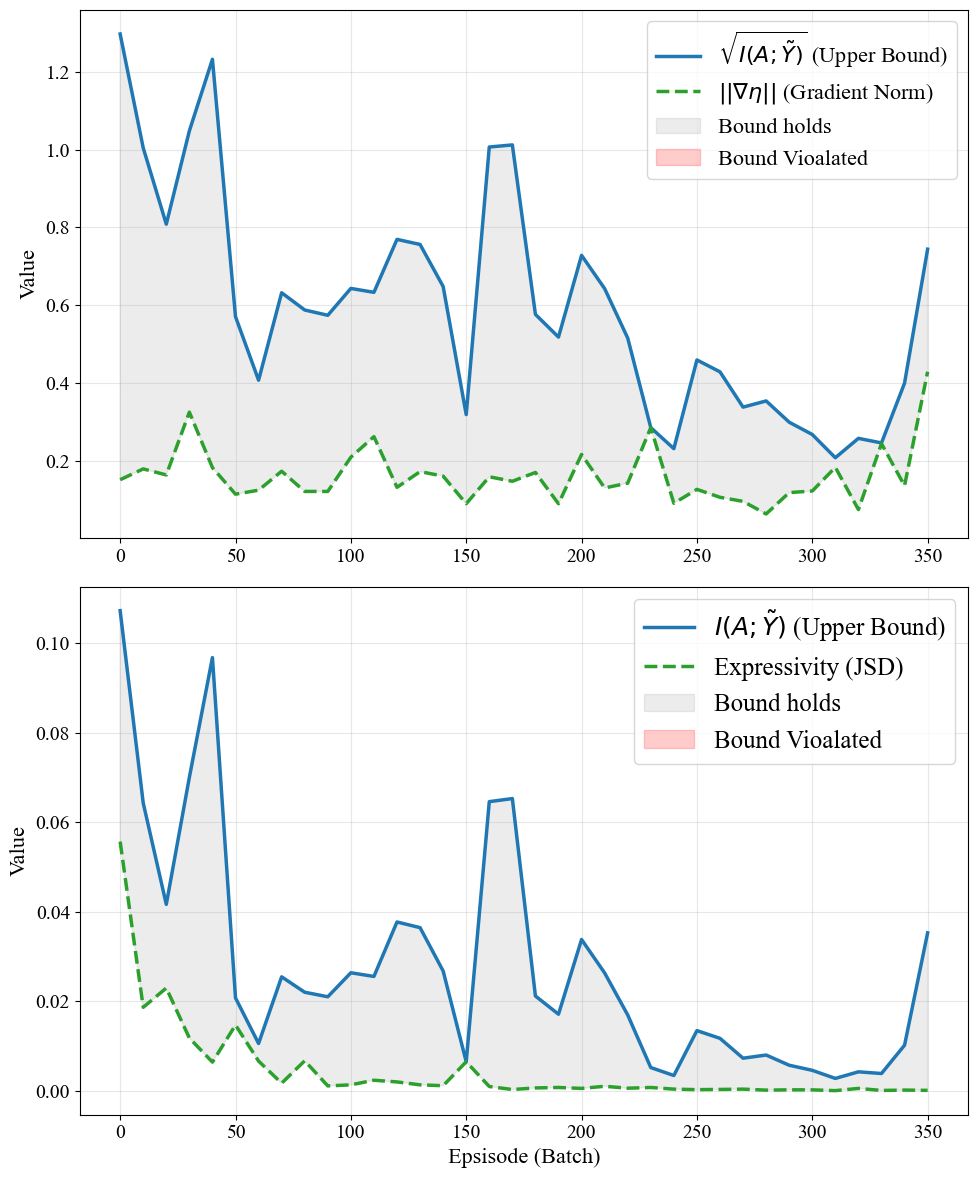

In [111]:
plot_verification_scaled("results_deep_BP.csv", "Deep_BP")

--- [Shallow] Data-Driven Estimation ---
1. Observed Y_max (Reward): 41.0
2. Estimated Constant C (Trainability): 0.3730
3. Estimated Cosntant K (Expressivity): 0.7425
-----------------------------------------------


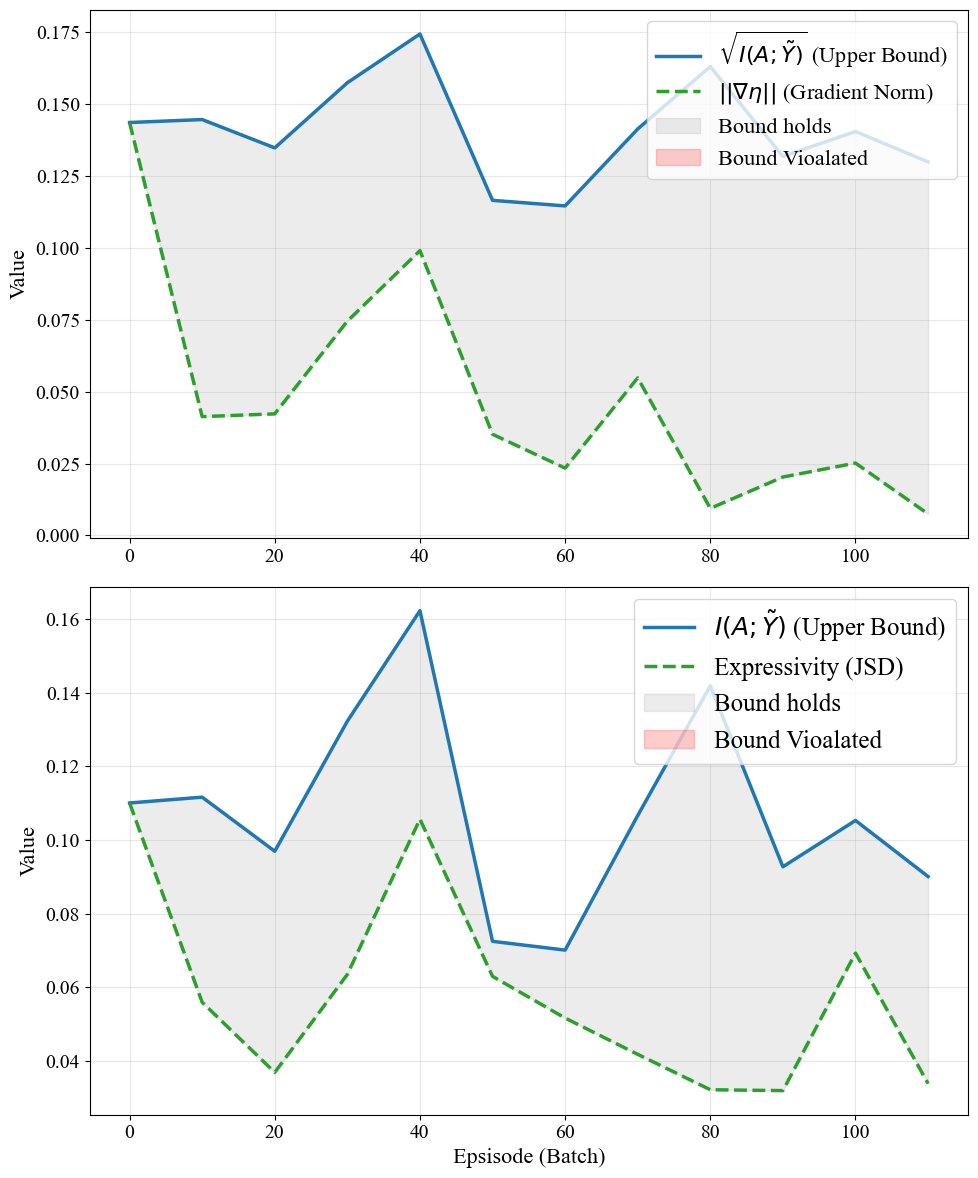

In [118]:
plot_verification_scaled("resuls_shallow.csv", "Shallow")

--- [Shallow] Data-Driven Estimation ---
1. Observed Y_max (Reward): 65.0
2. Estimated Constant C (Trainability): 1.2158
3. Estimated Cosntant K (Expressivity): 6.1212
-----------------------------------------------


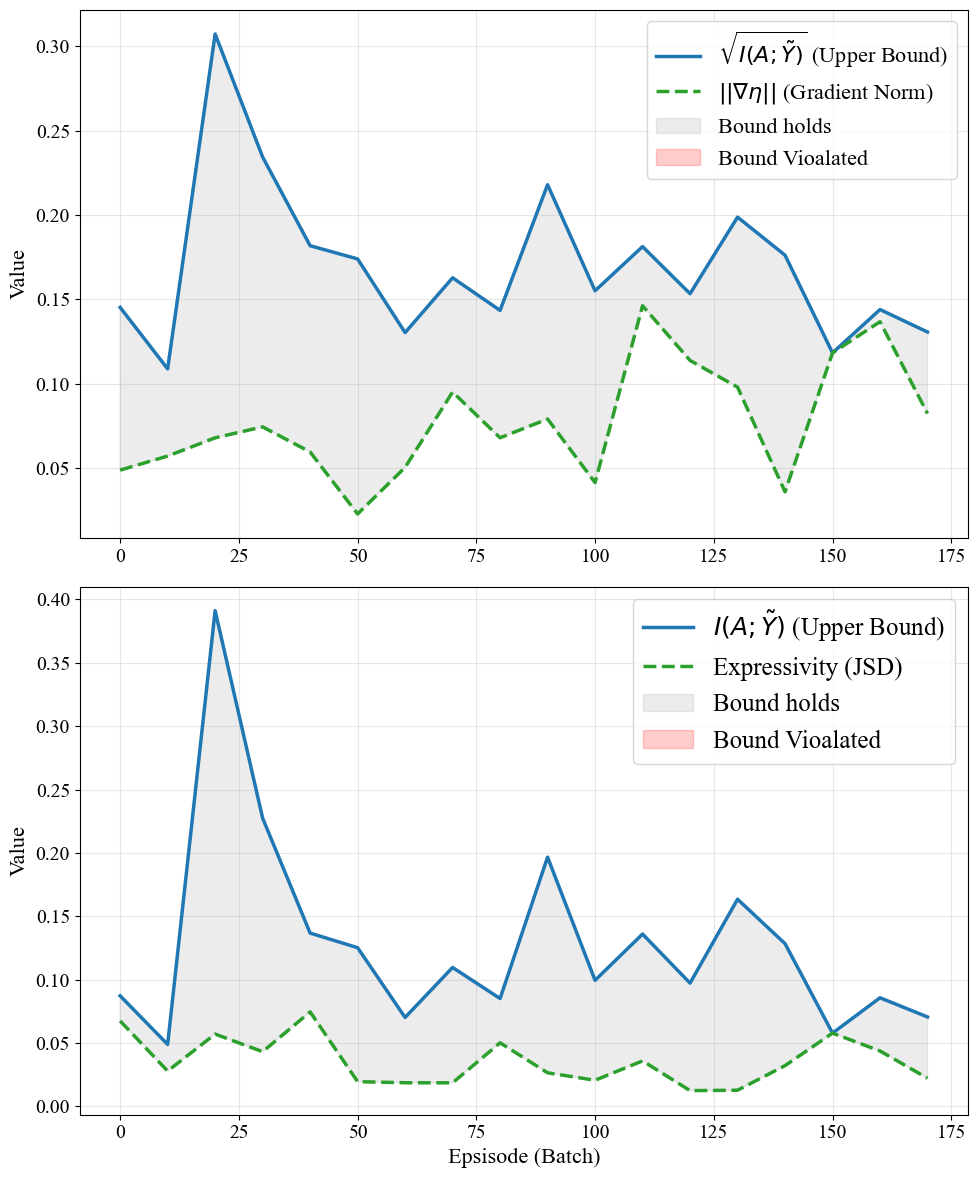

In [112]:
plot_verification_scaled("results_shallow.csv", "Shallow")